# Explore here

   duration_ms             name  popularity
9     3.795850  Trouble No More          47
5     7.519333          Jessica          53
7     5.290633    Whipping Post          57
8     6.725100        Soulshine          57
6     2.129100    Little Martha          58


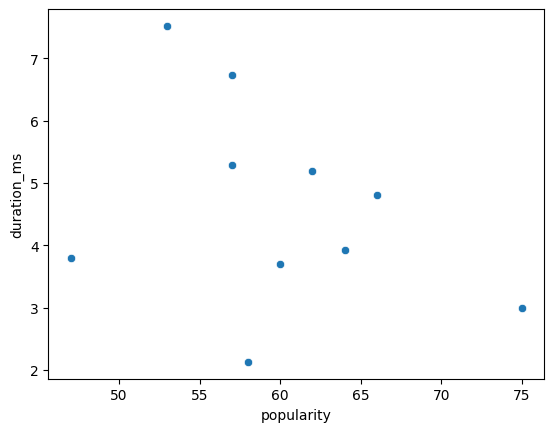

In [25]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

allman = 'spotify:artist:4wQ3PyMz3WwJGI5uEqHUVR'
response = con.artist_top_tracks(allman)


if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

  import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(5))


scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")